<a href="https://colab.research.google.com/github/parth-mango/MURA-abnormality-detection/blob/main/MURA_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/parth-mango/MURA-abnormality-detection.git

Cloning into 'DenseNet-MURA-PyTorch'...
remote: Enumerating objects: 75, done.
remote: Total 75 (delta 0), reused 0 (delta 0), pack-reused 75
Unpacking objects: 100% (75/75), done.


In [ ]:
!wget https://transfer.sh/1ophyT2/MURA-v1.1.zip # Downloading dataset

--2021-08-10 13:50:20--  https://transfer.sh/1ophyT2/MURA-v1.1.zip
Resolving transfer.sh (transfer.sh)... 144.76.136.153
Connecting to transfer.sh (transfer.sh)|144.76.136.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3380245855 (3.1G) [application/zip]
Saving to: ‘MURA-v1.1.zip’

MURA-v1.1.zip       100%[===================>]   3.15G  11.0MB/s    in 4m 28s  

2021-08-10 13:54:49 (12.0 MB/s) - ‘MURA-v1.1.zip’ saved [3380245855/3380245855]



In [ ]:
!unzip /content/MURA-v1.1.zip -d /content/mura_data   #Unzipping the data in folder

Streaming output truncated to the last 5000 lines.
   creating: /content/mura_data/MURA-v1.1/train/XR_SHOULDER/patient01061/
   creating: /content/mura_data/MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/
  inflating: /content/mura_data/MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image1.png  
  inflating: /content/mura_data/MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image3.png  
  inflating: /content/mura_data/MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image2.png  
   creating: /content/mura_data/MURA-v1.1/train/XR_SHOULDER/patient01016/
   creating: /content/mura_data/MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/
  inflating: /content/mura_data/MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image1.png  
  inflating: /content/mura_data/MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image3.png  
  inflating: /content/mura_data/MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image2.png  
   creati

In [ ]:
!rm -rf /content/mura_data/MURA-v1.1/train/XR_WRIST/patient07840  #Removing folder with some corrupt data

In [ ]:
%cd /content/MURA-abnormality-detection

In [ ]:
# Epoch changed from 5 to 15 in main.py

!python main.py

100% 3266/3266 [00:08<00:00, 371.99it/s]
100% 207/207 [00:00<00:00, 367.43it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
tai: {'train': 3987, 'valid': 295}
tni: {'train': 5761, 'valid': 364} 

Wt0 train: tensor([0.4090], device='cuda:0')
Wt0 valid: tensor([0.4476], device='cuda:0')
Wt1 train: tensor([0.5910], device='cuda:0')
Wt1 valid: tensor([0.5524], device='cuda:0')
/content/DenseNet-MURA-PyTorch/densenet.py:115: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
Train batches: 3458
Valid batches

In [ ]:
%cd /content/DenseNet-MURA-PyTorch

/content/DenseNet-MURA-PyTorch


#Loading pretrained model

In [ ]:
import torch
import numpy as np
from torch.autograd import Variable
from densenet import densenet169

In [ ]:
model1 = densenet169(pretrained=True)
model1 = model1.cuda()

/content/DenseNet-MURA-PyTorch/densenet.py:115: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [ ]:
PATH= "/content/DenseNet-MURA-PyTorch/models/model.pth"

model1.load_state_dict(torch.load(PATH, map_location= 'cuda'))
model1.eval()


#Visualizing Output

In [ ]:
!cp -r /content/mura_data/MURA-v1.1/train/XR_WRIST/patient00077 /content/images

In [ ]:
%cd /content/MURA-abnormality-detection/demo

In [ ]:
from visualize import get_study_level_data, get_dataloaders, plot

In [ ]:
BASE_DIR= "/content/images/patient00032/"
study_data = get_study_level_data(BASE_DIR)
dataloaders = get_dataloaders(study_data, batch_size=1)

study1_positive study


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f

torch.Size([4, 3, 224, 224]) Input shape


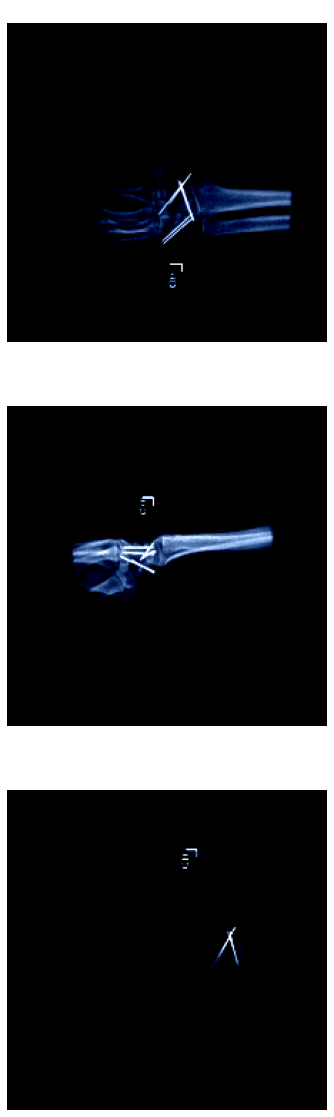

In [ ]:
plot(model1, dataloaders)

#Converting pytorch model into keras model


In [ ]:
%cd /content


/content


In [ ]:
!pip install pytorch2keras 
!pip install onnx==1.8.1
!pip install tensorflow==2.2.0

!git clone https://github.com/gmalivenko/pytorch2keras.git

In [ ]:
%cd /content/pytorch2keras/pytorch2keras

/content/pytorch2keras/pytorch2keras


In [ ]:
input_np = np.random.uniform(0, 1, (1, 3, 224, 224))
input_var = Variable(torch.cuda.FloatTensor(input_np))

In [ ]:
from converter import pytorch_to_keras
k_model = pytorch_to_keras(model1, input_var, [(3, 224, 224)], verbose=True)  

In [ ]:
k_model.save('/content/DenseNet-MURA-PyTorch/k_models')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: /content/DenseNet-MURA-PyTorch/k_models/assets


INFO:tensorflow:Assets written to: /content/DenseNet-MURA-PyTorch/k_models/assets


In [ ]:
!cp -r /content/DenseNet-MURA-PyTorch/models/model.pth /content/drive/MyDrive/saved_models
!cp -r /content/DenseNet-MURA-PyTorch/k_models /content/drive/MyDrive/saved_models